This document demonstrates how we could process the extract data to know the boundary, vehicle speed if we need.

Firstly, we need pandas, matplotlib and mpl_toolkit.mplot3d becasue we would like to see how tranlsation data visualizes, the 3d is the option since we have three dimensional data from extract resulst.

The 'df' in this file is also the variable to contain data read from CSV file.

The column we need to process is 'Translation', we convert this list (original form) to a new list because we need to hanlde each of them as separate axle.

The reason why team is using 'Description' other than 'Vehicle' is that some dataset is using same vehicle for differnet experimental team.

Once we converted translation to a new list, we assume x, y, and z are coresponding to first, second, and third data in tranlsation column.

To distiguish every team, the 'team_color' contains each team with their assigned colors.

The size of igure is giving 15 inches wide with 5 times of team colors, this part will demonstrate later on to find boudnary.

The grid is using 1x1x1 with 3d projection shape, the marker is using square as a good representation for 'node' in later netwokr simulation.

The label is using 'Trans' because original research team doesnt specify which of them represents x, y, and Z.



<IPython.core.display.Javascript object>


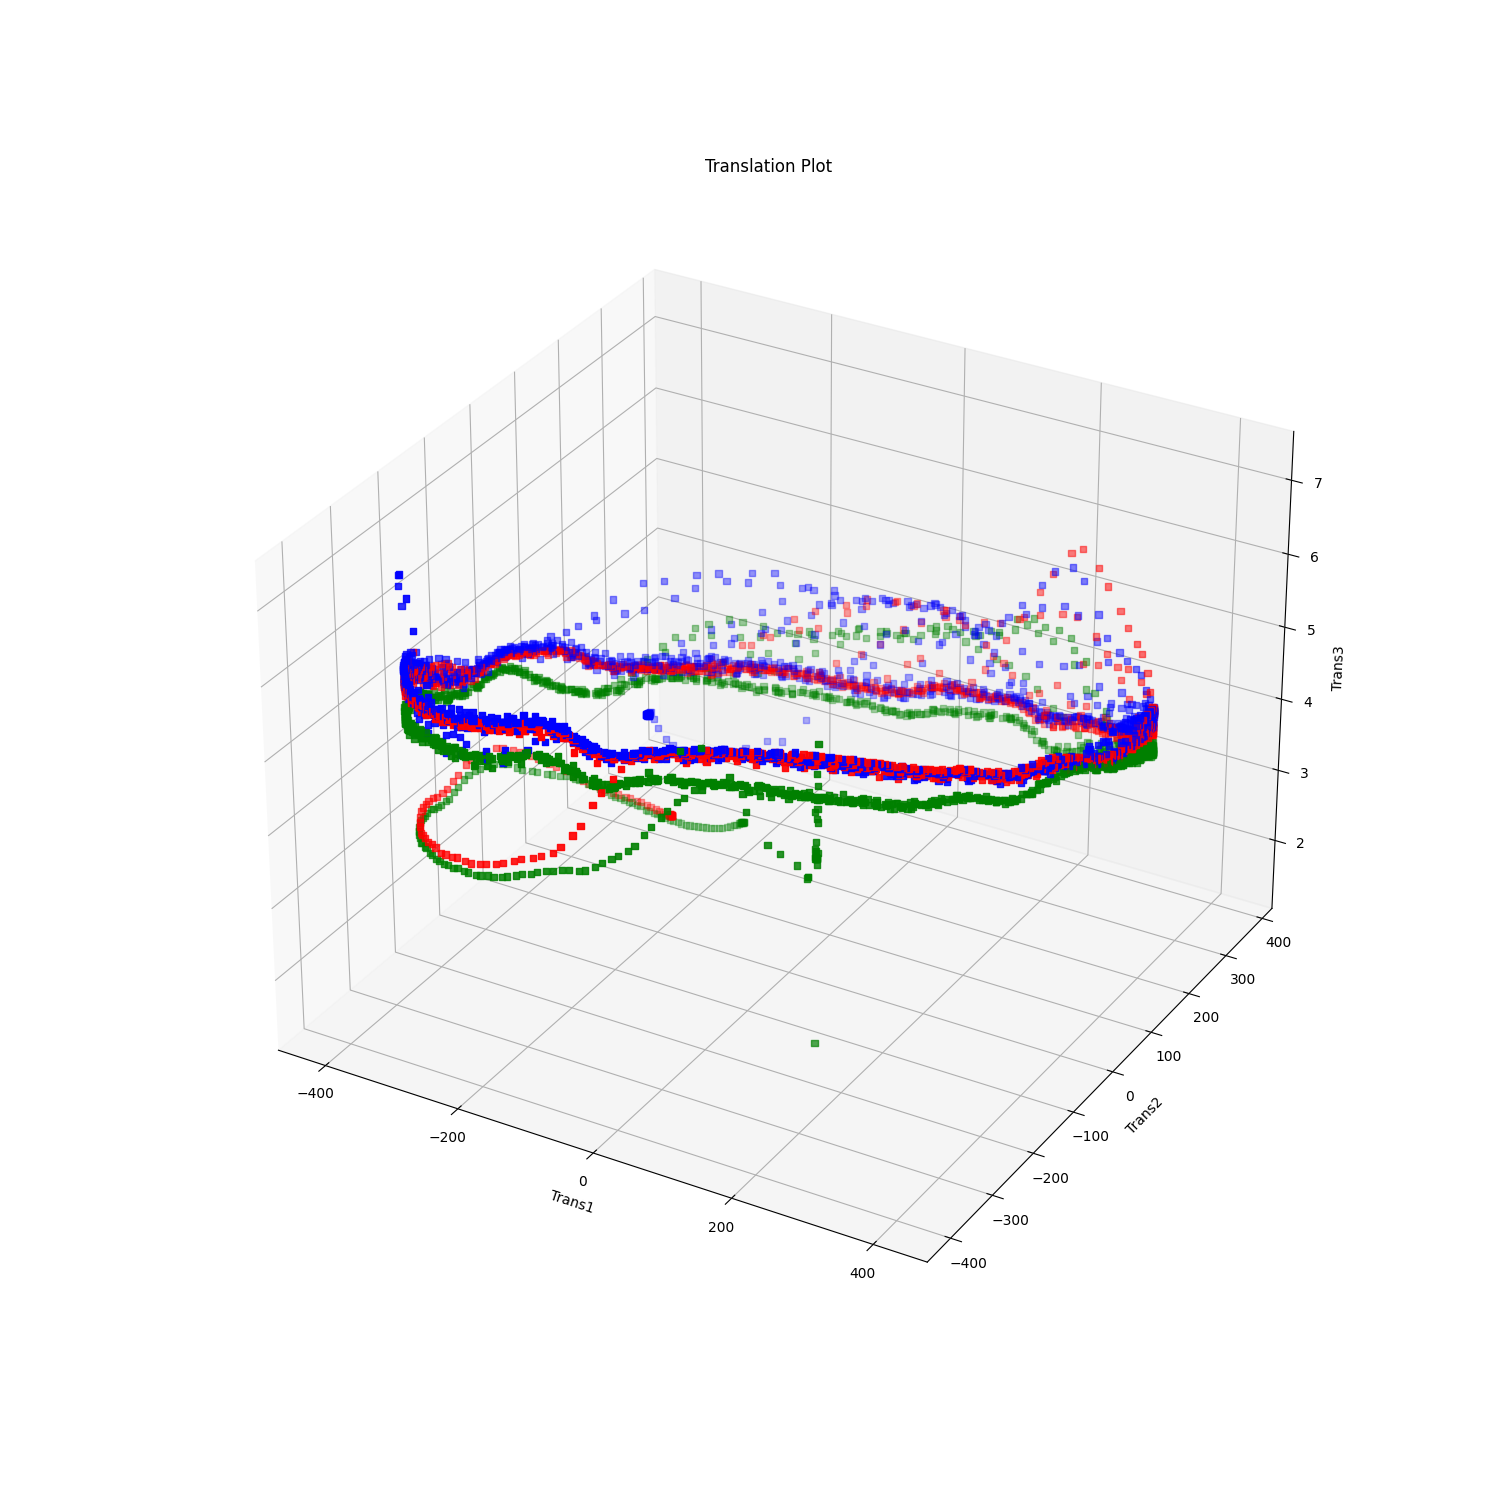

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook



df = pd.read_csv('vechile_info.csv')
translations = df['Translation'].apply(eval).tolist() # Converting string representation of the list to an actual list.

teams = df['Description'].tolist()#This place doesnt apply for (eval) since it only has single elements

# Define each axile with the attained list from 'Translation'
x = [translation[0] for translation in translations]
y = [translation[1] for translation in translations]
z = [translation[2] for translation in translations]
#team_color represents the trail from each team, the important thing is that it is using 'Description' since 'Team' cannot distiguish the team
team_colors = {'High speed multi-agent laps with Euroracing': 'red', 'High speed multi-agent laps with Polimove': 'blue', 'High speed multi-agent laps with TUM': 'green'}
#This represents the size of plot (width, hieght), 15 is '15iches', and height is 5 times of team numbers
fig = plt.figure(figsize=(15, 5 * len(team_colors)))



colors = [team_colors[team] for team in teams]

ax = fig.add_subplot(111, projection='3d')#This defined grid size, 111 means dimesion 1 x 1 x1
ax.scatter(x, y, z, c=colors, marker='s')#This step is rendering the data with marker type as spuare
ax.set_xlabel('Trans1')
ax.set_ylabel('Trans2')
ax.set_zlabel('Trans3')
ax.set_title('Translation Plot')
plt.show()




Based on the plots, it is possible to conclude that the experiment was implemented as an oval track in some senses, the third data from tranlsation list should be 'altituede' since track could have uphill corners and so on.

All the team are generating indentical plot to verify that the export data should be complete because all of those team are under the same selected scene.

<IPython.core.display.Javascript object>


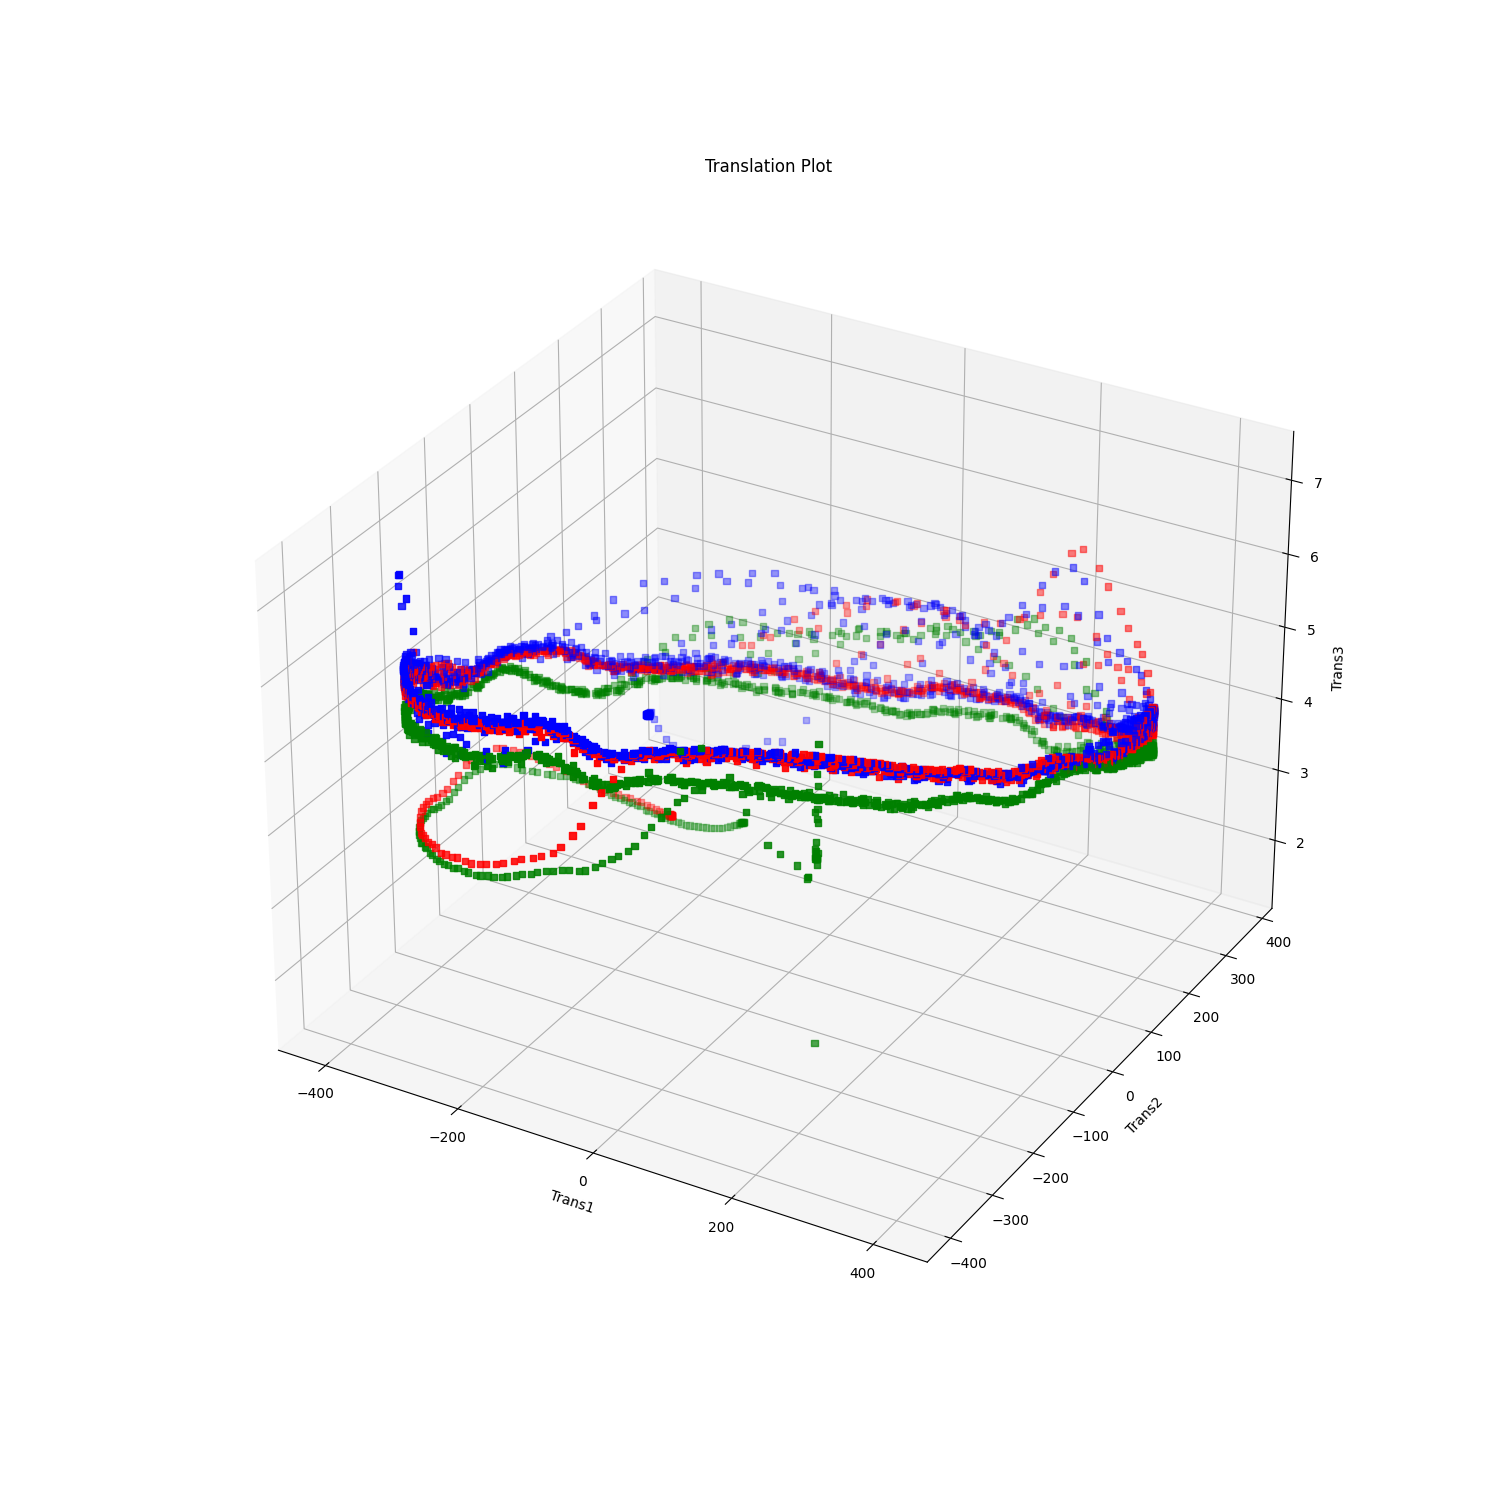

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook



df = pd.read_csv('vechile_info.csv')
translations = df['Translation'].apply(eval).tolist() # Converting string representation of the list to an actual list.

teams = df['Description'].tolist()#This place doesnt apply for (eval) since it only has single elements

# Define each axile with the attained list from 'Translation'
x = [translation[0] for translation in translations]
y = [translation[1] for translation in translations]
z = [translation[2] for translation in translations]

#Now, we must find the maximum and minimum value for each

xmax, xmin=max(x),min(x)
ymax, ymin=max(y),min(y)
zmax, zmin=max(z),min(z)

#Then, we should find out the fastest moment (speed) in each team






#team_color represents the trail from each team, the important thing is that it is using 'Description' since 'Team' cannot distiguish the team
team_colors = {'High speed multi-agent laps with Euroracing': 'red', 'High speed multi-agent laps with Polimove': 'blue', 'High speed multi-agent laps with TUM': 'green'}
#This represents the size of plot (width, hieght), 15 is '15iches', and height is 5 times of team numbers
fig = plt.figure(figsize=(15, 5 * len(team_colors)))



colors = [team_colors[team] for team in teams]

ax = fig.add_subplot(111, projection='3d')#This defined grid size, 111 means dimesion 1 x 1 x1
ax.scatter(x, y, z, c=colors, marker='s')#This step is rendering the data with marker type as spuare
ax.set_xlabel('Trans1')
ax.set_ylabel('Trans2')
ax.set_zlabel('Trans3')
ax.set_title('Translation Plot')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
df = pd.read_csv('vechile_info.csv')
# Assuming Translation column is in [x, y, z] format
translations = df['Translation'].apply(eval).tolist()
timestamps = df['Timestamp'].tolist()
# Calculate Euclidean distance between consecutive points
distances = [((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)**0.5
            for (x1, y1, z1), (x2, y2, z2) in zip(translations[:-1], translations[1:])]
# Calculate time differences between consecutive timestamps
time_diffs = [t2 - t1 for t1, t2 in zip(timestamps[:-1], timestamps[1:])]
# Calculate speeds
speeds = [distance / time_diff if time_diff != 0 else 0
         for distance, time_diff in zip(distances, time_diffs)]
# Append 0 for the first record since there's no previous record to calculate speed
speeds = [0] + speeds
# Add the speeds as a new column
df['Speed'] = speeds
# Display the DataFrame with the new Speed column
df1=pd.DataFrame(df)

df1[:40]

In [ ]:

# Calculate speed for each coordinate
df['Speed_X'] = df['Timestamp'].diff() / (df['Translation'].apply(eval).apply(lambda t: t[0]).diff())
df['Speed_Y'] = df['Timestamp'].diff() / (df['Translation'].apply(eval).apply(lambda t: t[1]).diff())
df['Speed_Z'] = df['Timestamp'].diff() / (df['Translation'].apply(eval).apply(lambda t: t[2]).diff())
# Identify the moment when each team is slowest
slowest_moments_X = df.groupby('Description')['Speed_X'].idxmin()
slowest_moments_Y = df.groupby('Description')['Speed_Y'].idxmin()
slowest_moments_Z = df.groupby('Description')['Speed_Z'].idxmin()
# Display results
print("Slowest Moments for Each Team (X Coordinate):")
print(df.loc[slowest_moments_X, ['Track', 'Vehicle', 'Description', 'Timestamp', 'Speed_X']])
print("\nSlowest Moments for Each Team (Y Coordinate):")
print(df.loc[slowest_moments_Y, ['Track', 'Vehicle', 'Description', 'Timestamp', 'Speed_Y']])
print("\nSlowest Moments for Each Team (Z Coordinate):")
print(df.loc[slowest_moments_Z, ['Track', 'Vehicle', 'Description', 'Timestamp', 'Speed_Z']])



In [3]:
import pandas as pd

# Create a DataFrame with the given data
data = {
    'Node ID': ['Node 0', 'Node 1', 'Node 2', 'Node 3', 'Node 0', 'Node 1', 'Node 2', 'Node 3', 'Node 0', 'Node 1', 'Node 2', 'Node 3'],
    'Position X': [0, 1, 2, 3, 1, 2, 3, 4, 3, 3, 4, 5],
    'Position Y': [0, 1, 2, 3, 1, 2, 3, 4, 3, 3, 4, 5],
    'Timestamp': [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('node_positions.csv', index=False)


In [9]:
df = pd.read_csv('vechile_info.csv', header=None)

# Export the first 10 lines to a new CSV file
df.to_csv('node10line.csv', index=False, header=False)